In [1]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

BHZ_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'BHZ':
        BHZ_st.append(st[i])

In [2]:
BHZ_st

11 Trace(s) in Stream:
CN.VLDQ..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.SADO..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.GAC..BHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.KGNO..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.KAPO..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.LONY..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.MNTQ..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.FRNY..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.NCB..BHZ  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.ERPA..BHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 sampl

In [3]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


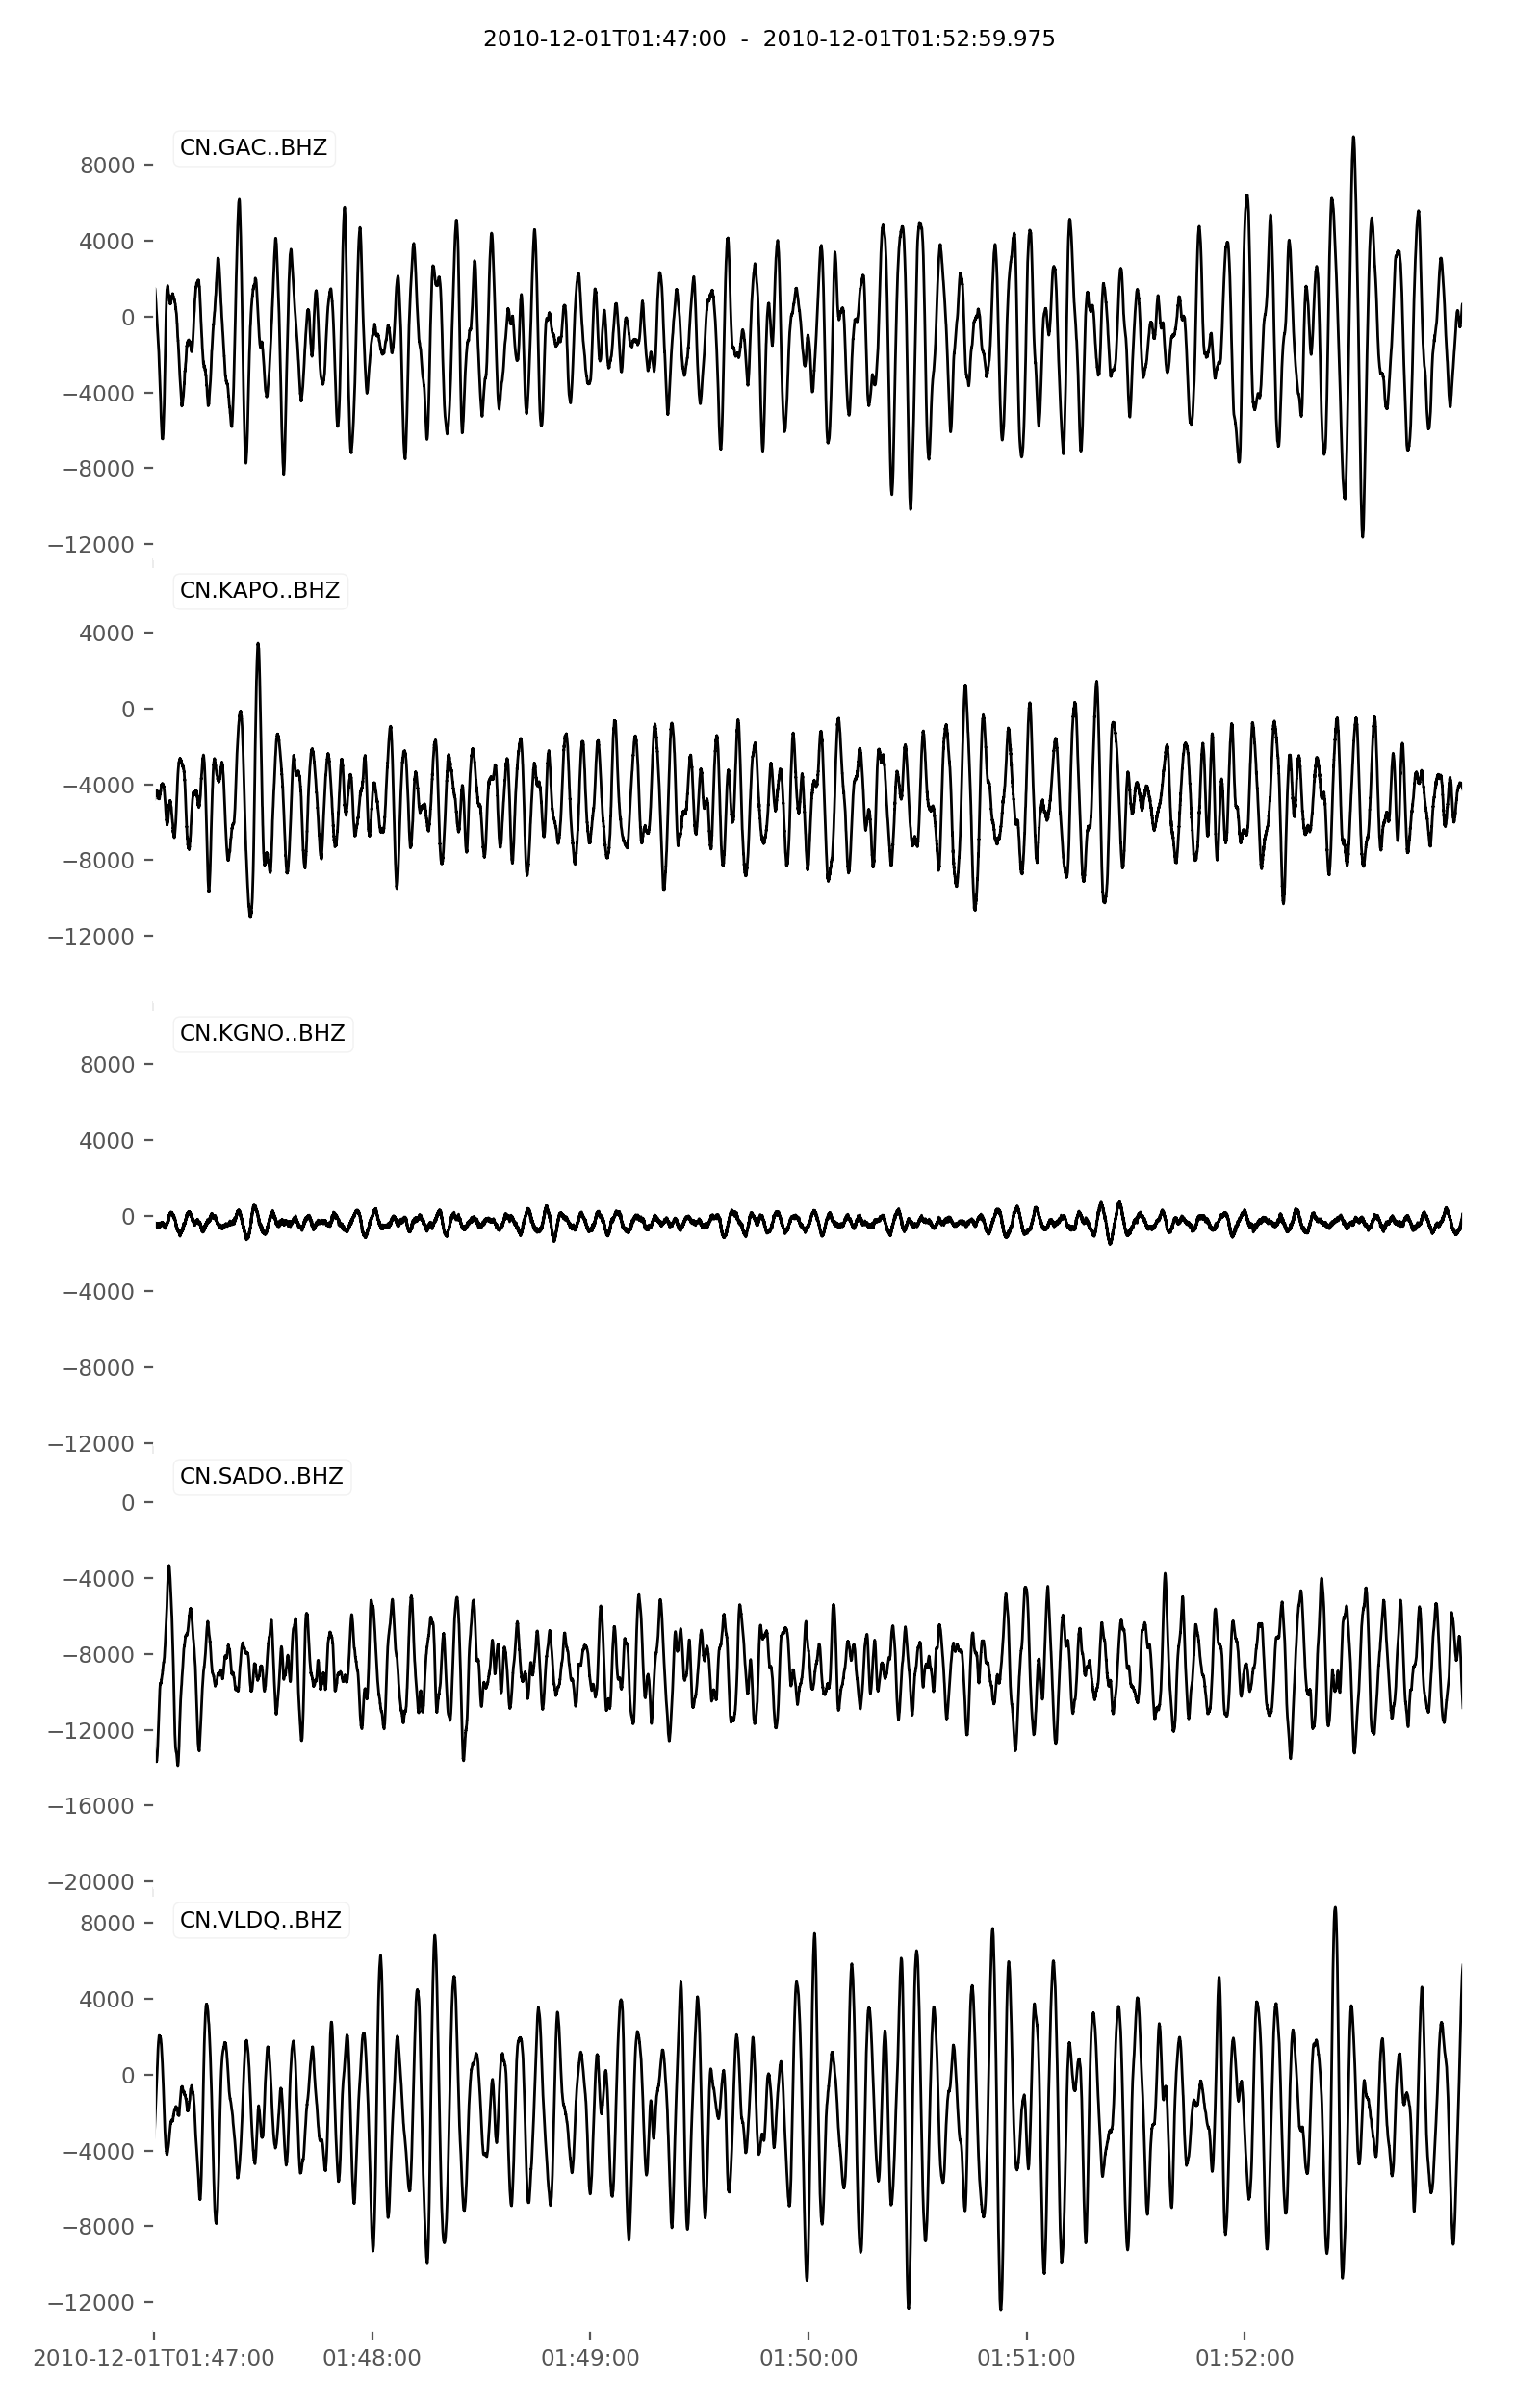

In [4]:
BHZ_st[:5].plot()

In [5]:
print("Station: ", [tr.stats['station'] for tr in BHZ_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in BHZ_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in BHZ_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in BHZ_st]))

Station:  ['VLDQ', 'SADO', 'GAC', 'KGNO', 'KAPO', 'LONY', 'MNTQ', 'FRNY', 'NCB', 'ERPA', 'BINY']
Sampling Rate:  [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
(delta, npts):  [(0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400)]
(start time, end time):  [[UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
 

In [6]:
BHZ_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in BHZ_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in BHZ_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
-1820.50833333 		 3625.3205318 		 (-12406, 8838)
-8721.085 		 1812.09664638 		 (-13903, -3339)
-1096.670625 		 3091.2543523 		 (-11650, 9497)
-355.080486111 		 317.483245371 		 (-1523, 779)
-4854.52444444 		 2223.86235122 		 (-10976, 3448)
727.257361111 		 259.271234829 		 (-9, 1491)
-1251.13611111 		 617.012149913 		 (-3521, 1267)
725.942013889 		 220.500781458 		 (-100, 1583)
-19251.1197917 		 338.871524159 		 (-20178, -18096)
523.199444444 		 209.311386389 		 (-195, 1246)
1554.35027778 		 290.190019068 		 (621, 2555)


In [9]:
around0 = obspy.core.stream.Stream()
notaround0 = obspy.core.stream.Stream()
for tr in BHZ_st:
    if (abs(np.mean(tr.data))-np.std(tr.data)) < 0:
        around0.append(tr)
    else:
        notaround0.append(tr)
print(len(around0))
print(len(notaround0))

2
9


<IPython.core.display.Javascript object>


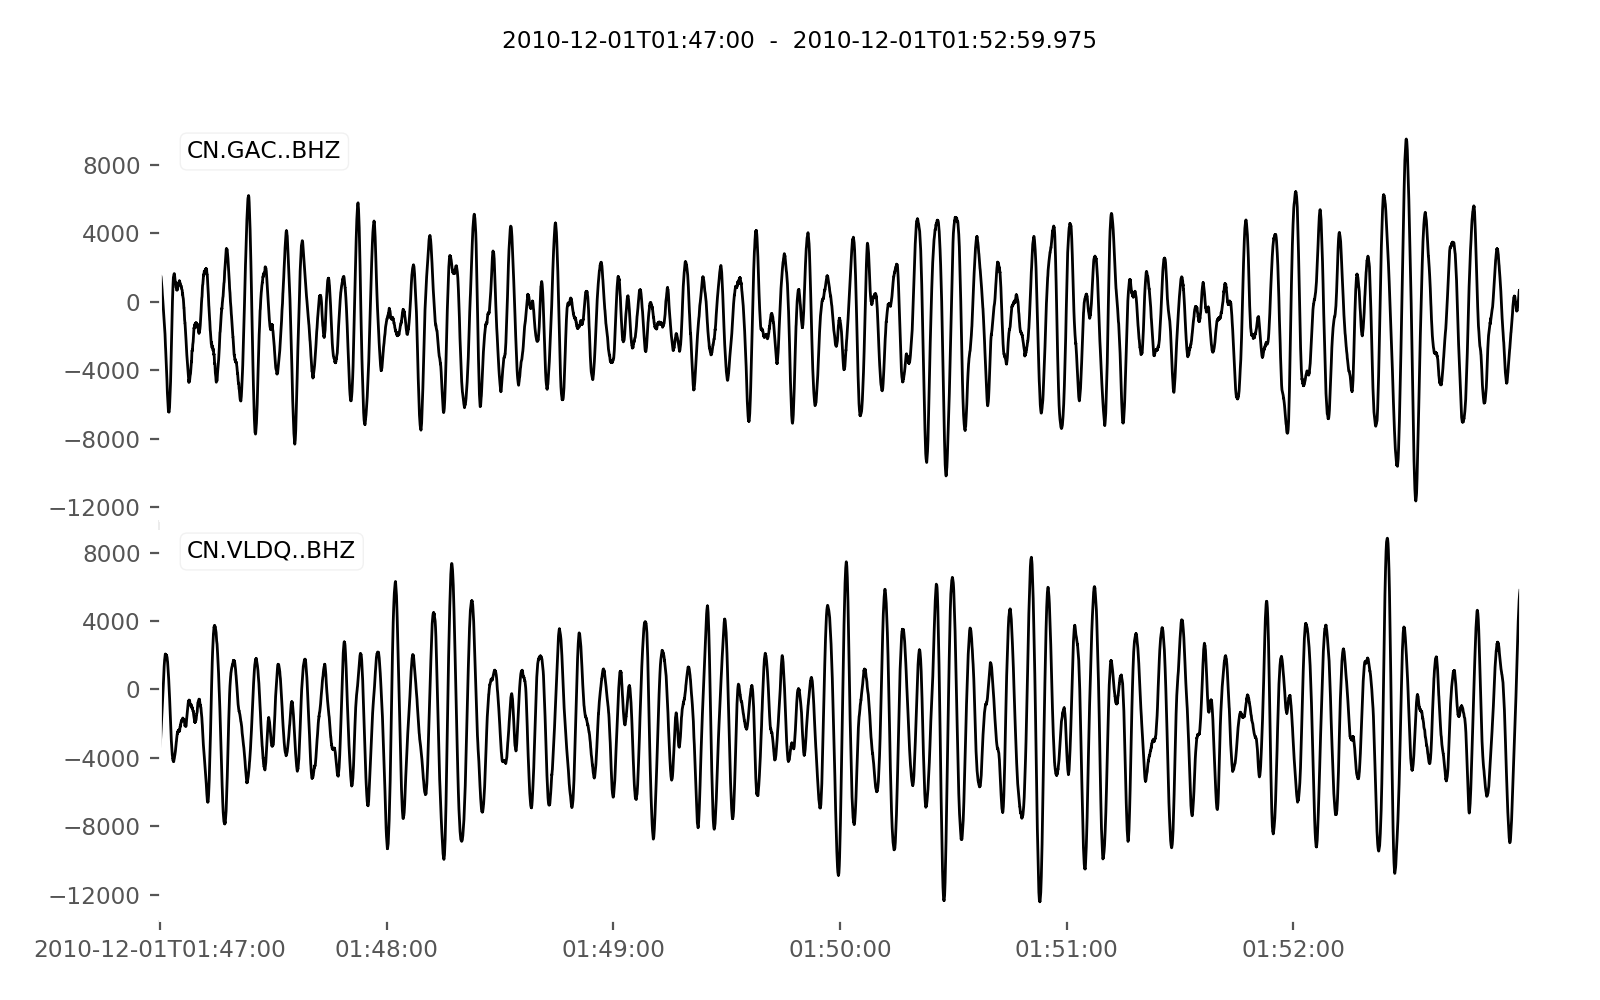

In [10]:
around0[:].plot()

<IPython.core.display.Javascript object>


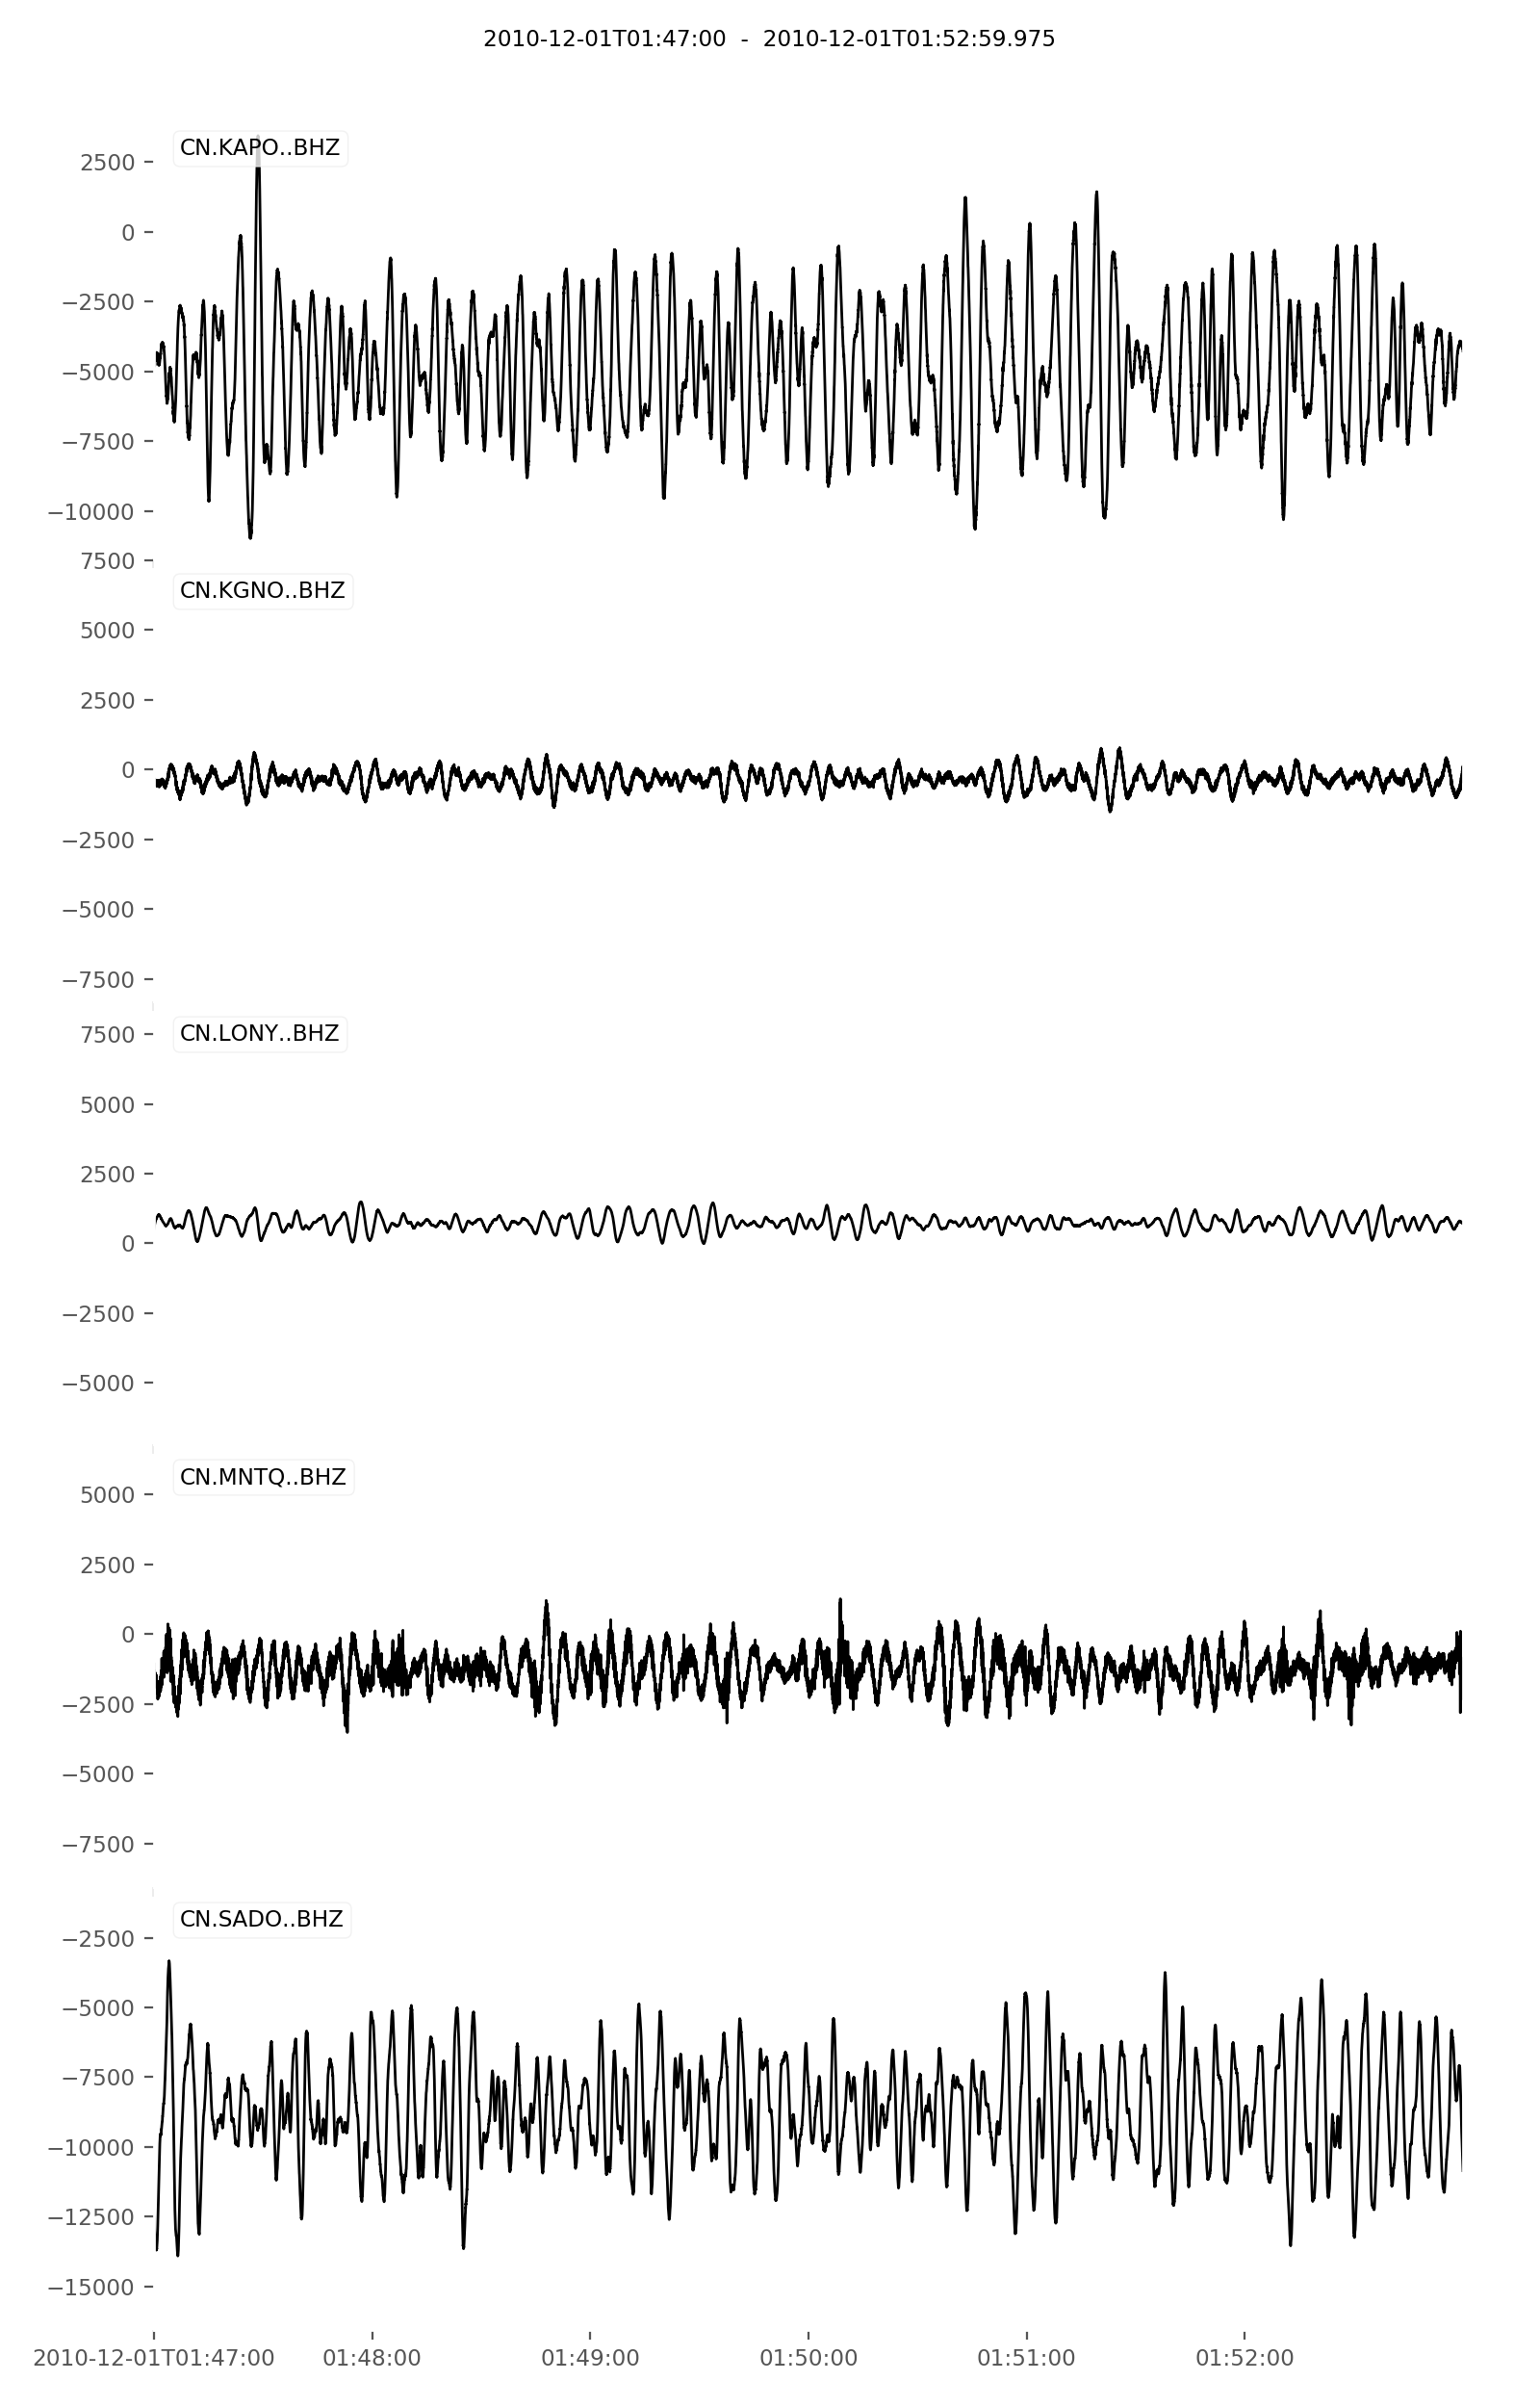

In [11]:
notaround0[:5].plot()